# **Proyek Machine Learning**

Nama: Melanie Sayyidina Sabrina Refman

## **Import Dataset**

In [1]:
from google.colab import files

# Mengupload file kaggle
files.upload()

Saving kaggle (3).json to kaggle (3).json


{'kaggle (3).json': b'{"username":"melanierefman","key":"ce0211165e67e656e93a08a36a7acd09"}'}

In [2]:
# Mengonfigurasi Kaggle API di lingkungan Colab
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
# Mengunduh dataset dari Kaggle menggunakan Kaggle API
!kaggle datasets download -d arashnic/book-recommendation-dataset

Dataset URL: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset
License(s): CC0-1.0
 58% 14.0M/24.3M [00:00<00:00, 141MB/s]
100% 24.3M/24.3M [00:00<00:00, 177MB/s]


In [4]:
from zipfile import ZipFile

# Mengekstrak file zip
file_name = "/content/book-recommendation-dataset.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Extraction Completed')

Extraction Completed


## **Import Library**

Pada bagian ini, dilakukan import berbagai library yang akan digunakan dalam proses pengolahan data, eksplorasi, pemodelan, hingga evaluasi model.

In [5]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score, f1_score
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD


*   Pandas dan NumPy: Digunakan untuk manipulasi dan analisis data.
*   Sklearn: Digunakan untuk vektorisasi teks, penghitungan kesamaan kosinus, dan evaluasi model.
*   Scipy: Untuk operasi matematika yang lebih kompleks seperti matriks sparse.
*   Matplotlib dan Seaborn: Untuk membuat visualisasi data.


## **Data Understanding**

Pada tahap ini, dataset yang akan digunakan dimuat dan diperiksa struktur awalnya. Langkah ini penting untuk memahami data mentah sebelum melanjutkan ke proses pembersihan dan analisis lebih lanjut.

Dataset terdiri dari tiga file CSV yang berisi informasi buku, penilaian pengguna, dan data pengguna.

In [6]:
# Load the dataset
books = pd.read_csv("Books.csv")
ratings = pd.read_csv("Ratings.csv")
users = pd.read_csv("Users.csv")

<ipython-input-6-153abaf039fb>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("Books.csv")


Menampilkan beberapa baris awal dari masing-masing dataset untuk mendapatkan gambaran umum tentang data.

#### **Books Dataset**

In [21]:
# Initial Data Exploration
print("Books.csv Dataset:")
books

Books.csv Dataset:


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [14]:
print("Missing values in Books:\n")
books.isnull().sum()

Missing values in Books:



,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,3


In [15]:
print("Duplicates in Books:\n")
books.duplicated().sum()

Duplicates in Books:



0

#### **Ratings Dataset**

In [22]:
print("Ratings.csv Dataset:")
ratings

Ratings.csv Dataset:


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [16]:
print("Missing values in Books:\n")
ratings.isnull().sum()

Missing values in Books:



,0
User-ID,0
ISBN,0
Book-Rating,0


In [17]:
print("Duplicates in Books:\n")
ratings.duplicated().sum()

Duplicates in Books:



0

#### **Users Dataset**

In [23]:
print("Users.csv Dataset:")
users

Users.csv Dataset:


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [18]:
print("Missing values in Books:\n")
users.isnull().sum()

Missing values in Books:



,0
User-ID,0
Location,0
Age,110762


In [19]:
print("Duplicates in Books:\n")
users.duplicated().sum()

Duplicates in Books:



0

## **Univariate Exploratory Data Analysis**

Dalam bagian ini, kita memeriksa struktur dataset secara lebih mendalam untuk mendapatkan informasi tentang kolom, tipe data, dan keberadaan data yang hilang. Hal ini membantu menentukan langkah pembersihan data yang diperlukan.

#### **Variable Books**

Memeriksa struktur dataset Books untuk melihat jumlah kolom, tipe data, dan jumlah data non-null di setiap kolom.

In [ ]:
# Variable Books
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Tahun publikasi adalah informasi penting dalam dataset buku. Namun, jika terdapat data yang tidak valid, seperti teks atau nilai kosong, kita konversi menjadi nilai numerik dengan NaN diganti 0. Langkah ini dilakukan untuk memastikan konsistensi tipe data.

In [ ]:
# Mengubah kolom Year-Of-Publication menjadi tipe data integer
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce').fillna(0).astype(int)
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  int64 
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.6+ MB


Memilih hanya kolom yang relevan dari dataset Books untuk mengurangi kompleksitas dan fokus pada informasi yang penting.

In [ ]:
# Mengambil data yang diperlukan
books = books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


Grafik berikut ini memberikan wawasan tentang penulis paling produktif di dataset. Informasi ini dapat digunakan untuk analisis lebih lanjut terkait popularitas buku mereka.

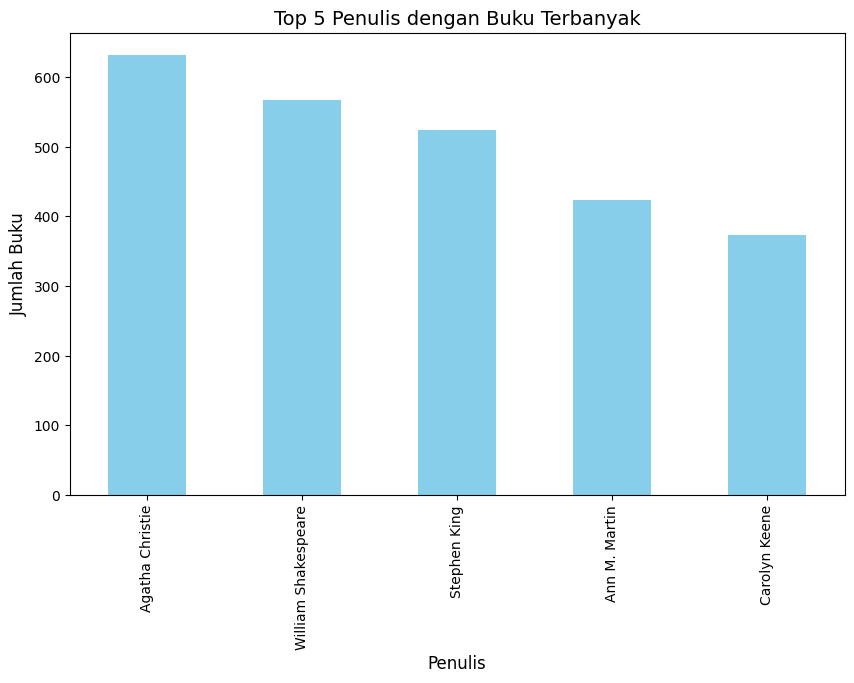

In [ ]:
# Menampilkan grafik 5 penulis yang menulis buku terbanyak
plt.figure(figsize=(10, 6))
books['Book-Author'].value_counts().head(5).plot(kind='bar', color='skyblue')
plt.title('Top 5 Penulis dengan Buku Terbanyak', fontsize=14)
plt.xlabel('Penulis', fontsize=12)
plt.ylabel('Jumlah Buku', fontsize=12)
plt.show()

#### **Variable Ratings**

Memeriksa struktur dataset Ratings untuk memahami distribusi penilaian yang diberikan oleh pengguna.

In [ ]:
# Variabel Rating
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


Grafik berikut ini menunjukkan distribusi nilai penilaian yang diberikan pengguna. Hal ini membantu mengidentifikasi pola seperti kecenderungan memberikan nilai tertentu.

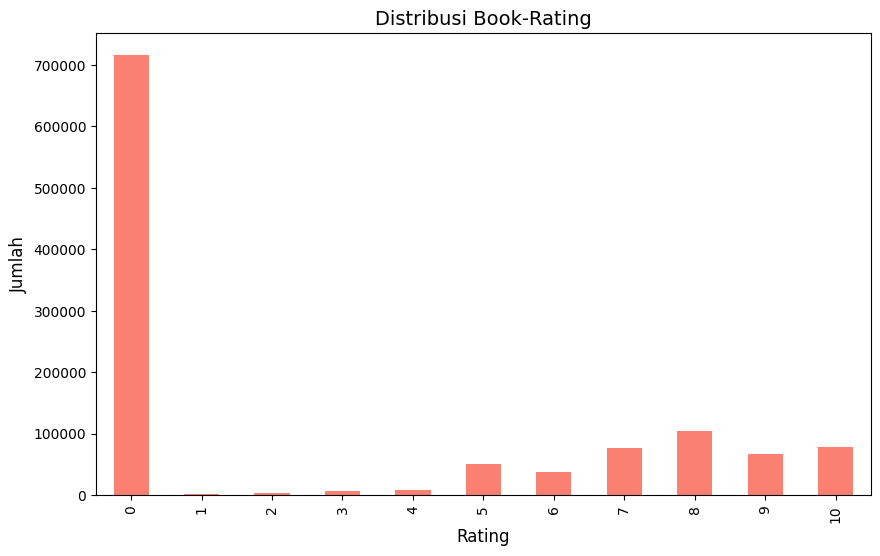

In [ ]:
# Menampilkan grafik distribusi rating
plt.figure(figsize=(10, 6))
ratings['Book-Rating'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('Distribusi Book-Rating', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.show()

#### **Variable Users**

Memeriksa struktur dataset Users untuk memahami informasi yang tersedia tentang pengguna, seperti lokasi atau usia.

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


## **Data Preparation**



Pada tahap ini, data dipersiapkan lebih lanjut dengan memeriksa dan menghapus nilai yang hilang, duplikasi, dan anomali. Langkah ini penting untuk memastikan kualitas data sebelum dilakukan pemodelan.

#### **Cek Missing Value**

Memeriksa apakah ada nilai yang hilang pada dataset.

In [ ]:
# Mengecek missing value pada dataset Books
print("Missing values in Books:\n")
books.isnull().sum()

Missing values in Books:



,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2


In [ ]:
books = books.dropna()
books.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0


In [ ]:
# Mengecek missing value pada dataset Ratings
print("Missing values in Ratings:\n")
ratings.isnull().sum()

Missing values in Ratings:



,0
User-ID,0
ISBN,0
Book-Rating,0


In [ ]:
# Mengecek missing value pada dataset Users
print("Missing values in Users:\n")
users.isnull().sum()

Missing values in Users:



,0
User-ID,0
Location,0
Age,110762


#### **Cek Data Duplikat**

ISBN yang duplikat dapat menyebabkan ketidakkonsistenan dalam analisis. Oleh karena itu, kita menghapus entri dengan ISBN yang sama.

In [ ]:
# Mengecek duplikasi ISBN pada Books
duplicates = books[books['ISBN'].duplicated()]
print("Jumlah ISBN duplikat:", len(duplicates))

Jumlah ISBN duplikat: 0


#### **Merge Dataset**

Menggabungkan dataset Ratings dan Books berdasarkan ISBN. Hal ini penting untuk mempersiapkan data yang digunakan pada model rekomendasi.

In [ ]:
# Merge Ratings dengan Books berdasarkan ISBN
ratings_books = pd.merge(ratings, books, on='ISBN', how='inner')
print("Merged Dataset Head:")
ratings_books

Merged Dataset Head:


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press
...,...,...,...,...,...,...,...
1031127,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig
1031128,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press
1031129,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf
1031130,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books


#### **Sampling Data**

Karena dataset terlalu besar, diambil 16000 data pertama. Sampling dilakukan untuk mengurangi waktu pemrosesan tanpa kehilangan esensi data.

In [ ]:
ratings_books = ratings_books[:16000]
ratings_books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press
...,...,...,...,...,...,...,...
15995,3363,0448190834,10,The Velveteen Rabbit: Or How Toys Become Real ...,Margery Williams,1987,Grosset &amp; Dunlap
15996,3363,0449005569,0,Love: A User's Guide,CLARE NAYLOR,1999,Ballantine Books
15997,3363,0449005577,0,Catching Alice,Clare Naylor,2000,Ballantine Books
15998,3363,0449005615,0,Seabiscuit: An American Legend,LAURA HILLENBRAND,2002,Ballantine Books


## **Modeling (Conten-Based Filtering)**

Pada bagian ini, kita membangun sistem rekomendasi berbasis konten menggunakan teknik TF-IDF untuk merepresentasikan data penulis buku dan cosine similarity untuk mengukur kesamaan antar buku.

#### **TF-IDF Vectorizer**

Tahap ini membangun representasi teks menggunakan TF-IDF. TF-IDF digunakan untuk merepresentasikan teks dalam bentuk vektor numerik. Kolom `Book-Author` digunakan untuk mencari kesamaan antar buku.

In [ ]:
# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Melakukan perhitungan IDF pada kolom Book-Author
tfidf_matrix = vectorizer.fit_transform(ratings_books['Book-Author'].fillna(''))

# Mendapatkan nama fitur dari indeks integer
tfidf_feature_names = vectorizer.get_feature_names_out()

# Mengubah vektor TF-IDF menjadi DataFrame
pd_tfidf = pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfidf_feature_names,
    index=ratings_books['Book-Title']
)

# Menampilkan sampel DataFrame TF-IDF (10x10)
print("TF-IDF DataFrame (10x10):")
pd_tfidf.sample(10, axis=1).sample(10, axis=0)

TF-IDF DataFrame (10x10):


,kirchoff,wallace,candace,gertridge,larson,deanie,naveen,ban,biebel,mensching
Book-Title,,,,,,,,,,
Murder at the Margin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Timeless/Four Breathtaking Tales of Hearts That Reach Across Time-For Love: A Midsummer Day's Dream/Lovers of the Golden Drum/Out of Time/Echoes of L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Goal: A Process of Ongoing Improvement,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gerald's Game,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Little Critter's Joke Book: Golden Look-Look Book (Golden Look-Look Book),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Clifford's Halloween,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cyber Way,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Woman Who Married a Bear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"The Playboy's Protegee (Harlequin American Romance, 988)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### **Cosine Similarity**

Tahap ini menghitung kesamaan antar buku berdasarkan penulis. Cosine similarity digunakan untuk mengukur seberapa mirip dua buku berdasarkan representasi TF-IDF.

In [ ]:
# Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix)

# Mengubah matriks kesamaan menjadi DataFrame
cosine_sim_df = pd.DataFrame(cosine_sim, index=ratings_books['Book-Title'], columns=ratings_books['Book-Title'])

# Menampilkan matriks kesamaan untuk beberapa judul buku
print("Cosine Similarity DataFrame (5x10):")
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Cosine Similarity DataFrame (5x10):


Book-Title,Equal Rites (Discworld Novels (Paperback)),Rush Limbaugh Is a Big Fat Idiot: And Other Observations (Abridged),Emily Post on Weddings : Revised Edition,La casa de Bernarda Alba,"Guy Gilchrist's Thanks a Lot, Triceratot: A Tiny Dinos Story About Helping Others"
Book-Title,,,,,
Leadership,0.0,0.0,0.000000,0.0,0.0
Tombley's Walk,0.0,0.0,0.000000,0.0,0.0
Veiled Sentiments: Honor and Poetry in a Bedouin Society,0.0,0.0,0.000000,0.0,0.0
He Shall Thunder in the Sky,0.0,0.0,0.339857,0.0,0.0
Out in the wilds: How to look after yourself (Practical Puffin),0.0,0.0,0.000000,0.0,0.0
Frog and Toad Are Friends,0.0,0.0,0.000000,0.0,0.0
Source Book for Teaching English as a Second Language,0.0,0.0,0.000000,0.0,0.0
Stacey's Mistake (Baby-Sitters Club (Paperback)),0.0,0.0,0.000000,0.0,0.0
Lythande,0.0,0.0,0.000000,0.0,0.0


#### **Implementasi Sistem Rekomendasi**

Tahap ini mengimplementasikan fungsi rekomendasi berdasarkan kesamaan kosinus. Fungsi `recommend_books` akan menghitung skor kesamaan dan memilih 10 buku dengan skor tertinggi (kecuali buku itu sendiri).

In [ ]:
# Implementasi Rekomendasi
def recommend_books(book_title, cosine_sim=cosine_sim_df):
    # Memastikan buku ada dalam DataFrame
    if book_title not in cosine_sim.index:
        return "Buku tidak ditemukan dalam dataset."

    # Mendapatkan skor kesamaan untuk semua buku
    sim_scores = cosine_sim[book_title].sort_values(ascending=False)

    # Mendapatkan 10 buku yang paling mirip (kecuali buku itu sendiri)
    sim_scores = sim_scores.iloc[1:11]

    # Mengembalikan judul buku yang mirip
    return sim_scores.index.tolist()

Fungsi `book_recommendation` digunakan untuk mencetak hasil rekomendasi tersebut.

In [ ]:
def book_recommendation(book_title_test):
    print(f"Rekomendasi Buku untuk '{book_title_test}':")
    recommendations = recommend_books(book_title_test)
    if isinstance(recommendations, str):
        print(recommendations)
    else:
        for i, rec in enumerate(recommendations, 1):
            print(f"{i}. {rec}")

Berikut contoh implementasi dengan judul buku tes:

In [ ]:
book_title_test = "Into the Land of the Unicorns (Unicorn Chronicles)"
book_recommendation(book_title_test)

Rekomendasi Buku untuk 'Into the Land of the Unicorns (Unicorn Chronicles)':
1. My Teacher Fried My Brains (MY TEACHER BOOKS)
2. Into the Land of the Unicorns (Unicorn Chronicles)
3. A Glory of Unicorns
4. Into the Land of the Unicorns (The Unicorn Chronicles, Book 1)
5. Jeremy Thatcher, Dragon Hatcher : Jeremy Thatcher Dragon Hatcher
6. My Teacher Fried My Brains (MY TEACHER BOOKS)
7. SPACE BRAT (SPACE BRAT 1) : SPACE BRAT
8. A Piece of My Mind: A Collection of Essays from the Journal of the American Medical Association
9. Das letzte Konzert.
10. Sprinter (Hunter's Western Series)


## **Evaluation**

Tujuan dari evaluasi ini adalah untuk mengukur performa model dalam menentukan similarity antar item dengan menggunakan metrik evaluasi seperti precision, recall, dan F1-score. Model ini mengukur kesamaan antar item dengan cosine similarity dan membandingkan hasilnya terhadap nilai threshold yang telah ditentukan (0.5).

**Tahapan Evaluasi**

1.   **Penentuan Threshold** : Threshold 0.5 digunakan untuk mengklasifikasikan apakah dua item dianggap similar (1) atau not similar (0) berdasarkan nilai cosine similarity.
2.   **Ground truth** : Ground truth data dibuat dengan membandingkan nilai cosine similarity dengan threshold. Jika nilai similarity lebih besar atau sama dengan threshold, maka dianggap sebagai 1 (similar), sebaliknya 0 (not similar).
3.   **Sampling Data** : Untuk efisiensi evaluasi, hanya 1000 sampel yang diambil secara acak dari matriks similarity.
4.   **Evaluasi dengan Classification Report** : Hasil prediksi dibandingkan dengan ground truth menggunakan precision, recall, dan F1-score.

In [ ]:
# Menentukan threshold untuk menentukan similarity sebagai 1 atau 0
threshold = 0.5

# Membuat ground truth data berdasarkan threshold
ground_truth = (cosine_sim >= threshold).astype(int)

# Sampling sebagian data dari cosine similarity matrix untuk evaluasi
sample_indices = np.random.choice(cosine_sim.shape[0], size=1000, replace=False)
cosine_sim_sample = cosine_sim[np.ix_(sample_indices, sample_indices)]
ground_truth_sample = ground_truth[np.ix_(sample_indices, sample_indices)]

# Meratakan matriks untuk evaluasi
cosine_sim_flat = cosine_sim_sample.ravel()
ground_truth_flat = ground_truth_sample.ravel()

# Menghitung metrik evaluasi menggunakan precision, recall, dan F1-score
from sklearn.metrics import classification_report

predictions = (cosine_sim_flat >= threshold).astype(int)

# Menggunakan classification report untuk mendapatkan semua metrik evaluasi
report = classification_report(ground_truth_flat, predictions, zero_division=1, output_dict=True)
precision = report["1"]["precision"]
recall = report["1"]["recall"]
f1 = report["1"]["f1-score"]

# Menampilkan hasil evaluasi
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 1.00
Recall: 1.00
F1-Score: 1.00


**Hasil Evaluasi**

*   **Precision** : 1.00
(Model berhasil memprediksi semua pasangan similar secara akurat tanpa ada kesalahan.)
*   **Recall** : 1.00
(Model berhasil menemukan semua pasangan yang seharusnya similar dalam data ground truth.)
*   **F1-Score** : 1.00
(Model memiliki keseimbangan sempurna antara precision dan recall.)

## **Kesimpulan**

Hasil evaluasi menunjukkan bahwa model memiliki performa sempurna dengan nilai precision, recall, dan F1-score sebesar 1.00. Ini berarti:

*   Semua pasangan yang diprediksi sebagai similar benar-benar similar.
*   Semua pasangan yang seharusnya similar ditemukan oleh model.
*   Tidak ada false positives atau false negatives.